<a href="https://colab.research.google.com/github/TheChanRProject/MLNS_BCI_Project/blob/master/nb/BCI_Intra_Subject_Randomized_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_curve, auc 
from sklearn.preprocessing import scale 
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from scipy import interp 


In [2]:
!pip install scikit-plot jupyterthemes

In [3]:
ls

adc.json  MLNS_BCI_Project/  sample_data/


In [4]:
cd MLNS_BCI_Project

/content/MLNS_BCI_Project


In [5]:
ls

data/    nb/              poster/    results/  tasks_resources.md
images/  paper-analysis/  README.md  src/


In [22]:
cd src/cross-val

[Errno 2] No such file or directory: 'src/cross-val'
/content/MLNS_BCI_Project/src/cross-val


In [23]:
ls

gridSearch.py                        testing/
intra-subject/                       training/
logistic-regression.py               VPaan_DevAttentionX.csv
merged_labeled_DevAttentionX_v2.csv  VPaan_DevAttentionY.csv
merged_labeled_DevAttentionY_v2.csv  VPaap_DevAttentionX.csv
neural-network.py                    VPaap_DevAttentionY.csv
__pycache__/                         VPaas_DevAttentionX.csv
random-forest.py                     VPaas_DevAttentionY.csv
randomizedSearch.py                  VPgcc_DevAttentionX.csv
roc.py                               VPgcc_DevAttentionY.csv


In [24]:
mkdir intra-subject

mkdir: cannot create directory ‘intra-subject’: File exists


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth) 

In [0]:
merged_x = drive.CreateFile({"id": "1-s6kpsj5Gvc86FtIrfk_AhlRvVZRi8Mj"}) 
merged_x.GetContentFile("merged_labeled_DevAttentionX.csv") 

In [0]:
merged_y = drive.CreateFile({"id": "1tHrpcAJjUuerjXrDJ1RGNRCmffPtkW33"})
merged_y.GetContentFile("merged_labeled_DevAttentionY.csv")

In [0]:
mv *.csv intra-subject

In [0]:
neurFeat = pd.read_csv("intra-subject/merged_labeled_DevAttentionX.csv")
neurFeat.drop(list(neurFeat.columns)[0], axis=1, inplace=True)
classVals = pd.read_csv("intra-subject/merged_labeled_DevAttentionY.csv")
classVals.drop(list(classVals.columns)[0], axis=1, inplace=True) 

In [30]:
print(neurFeat.shape)
print(classVals.shape)

(126082, 189)
(126082, 1)


In [31]:
.20 * 126080

25216.0

In [0]:
neuralFeatures = neurFeat.sample(n=126080, axis=0, random_state=100) 
classValues = classVals.sample(n=126080, axis=0, random_state=100)  

In [33]:
print(neuralFeatures.shape) 
print(classValues.shape)

(126080, 189)
(126080, 1)


In [34]:
# Scale features 
zFeatures = scale(neuralFeatures, axis=0) 

Xtrain, Xtest, Ytrain, Ytest = train_test_split(zFeatures, classValues, test_size=0.20, random_state=100) 

print(f"Shape of X Training Set : {Xtrain.shape}") 
print(f"Shape of X Testing Set : {Xtest.shape}")
print(f"Shape of Y Training Set: {Ytrain.shape}")
print(f"Shape of Y Testing Set: {Ytest.shape}")  

Shape of X Training Set : (100864, 189)
Shape of X Testing Set : (25216, 189)
Shape of Y Training Set: (100864, 1)
Shape of Y Testing Set: (25216, 1)


In [35]:
ls

gridSearch.py           neural-network.py  randomizedSearch.py  training/
intra-subject/          __pycache__/       roc.py
logistic-regression.py  random-forest.py   testing/


In [0]:
from randomizedSearch import * 

In [39]:
# Intra Subject Randomized Search 

rf_rs = RandomForest(Xtrain, Ytrain, cv=5, n=1) 
print(rf_rs) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 17.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   21.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 17.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

{'mean_fit_time': array([1018.56565447]), 'std_fit_time': array([10.69879179]), 'mean_score_time': array([4.40941877]), 'std_score_time': array([0.10486206]), 'param_n_estimators': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[None],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_criterion': masked_array(data=['gini'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_bootstrap': masked_array(data=[False],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 1000, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}], 'split0_test_score': array([0.99147375]), 'split1_test_score': array([0.99162247]), 'split2_test_score': array([0.99097804]), 'split3_test_score': array([0.99152332]), 'split4_test_score': array([0.98949038]), 'mean_test_score': array([0.99101761]), '

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 21.5min finished


In [38]:
# Neural Network Random Search

nn_rs = NeuralNetwork(Xtrain, Ytrain, cv=5, n=1) 
print(nn_rs) 

Iteration 1, loss = 0.49712679
Iteration 2, loss = 0.39039295
Iteration 3, loss = 0.32781217
Iteration 4, loss = 0.27524188
Iteration 5, loss = 0.23839820
Iteration 6, loss = 0.19934226
Iteration 7, loss = 0.17487225
Iteration 8, loss = 0.14287813
Iteration 9, loss = 0.13555724
Iteration 10, loss = 0.10471712
Iteration 11, loss = 0.09953747
Iteration 12, loss = 0.07526548
Iteration 13, loss = 0.07082745
Iteration 14, loss = 0.06746972
Iteration 15, loss = 0.05572004
Iteration 16, loss = 0.06781634
Iteration 17, loss = 0.04249142
Iteration 18, loss = 0.04387244
Iteration 19, loss = 0.03883271
Iteration 20, loss = 0.05778873
Iteration 21, loss = 0.03450006
Iteration 22, loss = 0.03725831
Iteration 23, loss = 0.03527888
Iteration 24, loss = 0.03367426
Iteration 25, loss = 0.06326064
Iteration 26, loss = 0.02751201
Iteration 27, loss = 0.02762235
Iteration 28, loss = 0.03468069
Iteration 29, loss = 0.03446680
Iteration 30, loss = 0.02760830
Iteration 31, loss = 0.02527482
Iteration 32, los

In [41]:
# Logistic Regression Random Search 

lr_rs = noSGDLogisticRegression(Xtrain, Ytrain, cv=5, n=1) 
print(lr_rs) 

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]{'mean_fit_time': array([81.02607403]), 'std_fit_time': array([20.63617664]), 'mean_score_time': array([0.01470532]), 'std_score_time': array([0.00407968]), 'param_penalty': masked_array(data=['l2'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_intercept_scaling': masked_array(data=[1.25],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_fit_intercept': masked_array(data=[True],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'penalty': 'l2', 'intercept_scaling': 1.25, 'fit_intercept': True}], 'split0_test_score': array([0.81797452]), 'split1_test_score': array([0.81916423]), 'split2_test_score': array([0.82223764]), 'split3_test_score': array([0.82595549]), 'split4_test_score': array([0.81865953]), 'mean_test_score': array([0.8207983]), 'std_test_score': array([0.00296266]), 'rank_test_score': array([1], dt

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.2s finished


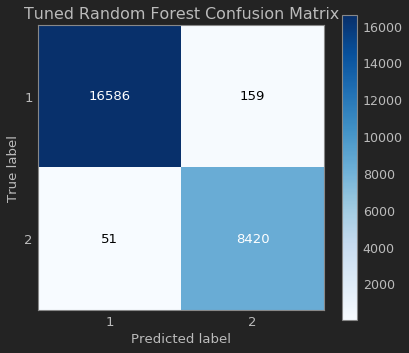

In [43]:
from scikitplot.metrics import plot_confusion_matrix 
from jupyterthemes import jtplot 
jtplot.style(theme="monokai") 

# Random Forest Confusion Matrix 

plot_confusion_matrix(Ytest, rf_rs.predict(Xtest), title="Tuned Random Forest Confusion Matrix") 

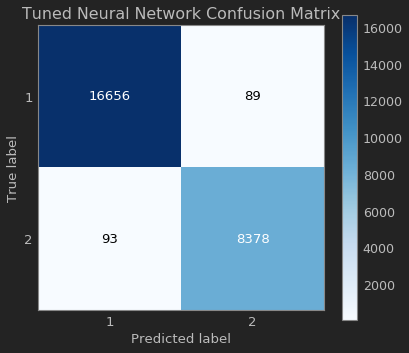

In [44]:
plot_confusion_matrix(Ytest, nn_rs.predict(Xtest), title="Tuned Neural Network Confusion Matrix") 

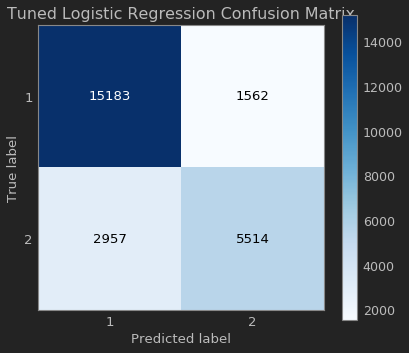

In [45]:
plot_confusion_matrix(Ytest, lr_rs.predict(Xtest), title="Tuned Logistic Regression Confusion Matrix") 

In [0]:
# Cross Validated ROC Curves 

## Random Forest ROC Curve 

rf_model = RandomForestClassifier(n_estimators=1000, criterion="gini", bootstrap=False, max_depth=None)
Xtrain2, Xval, Ytrain2, Yval = train_test_split(Xtrain, Ytrain, test_size=0.20, random_state=1000) 
rf_fit = rf_model.fit(Xtrain2, Ytrain2) 



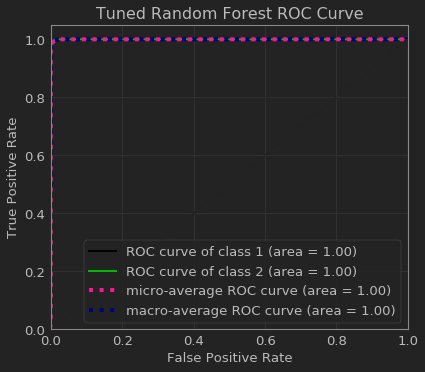

In [67]:
rf_prob = rf_fit.predict_proba(Xval) 

from scikitplot.metrics import plot_roc 

plot_roc(Yval, rf_prob, title="Tuned Random Forest ROC Curve") 

In [0]:
## Neural Network ROC Curve 

nn_model = MLPClassifier(solver='adam', learning_rate='adaptive', alpha=0.0001, shuffle=True, hidden_layer_sizes=(100,), activation='relu')
nn_fit = nn_model.fit(Xtrain2, Ytrain2) 

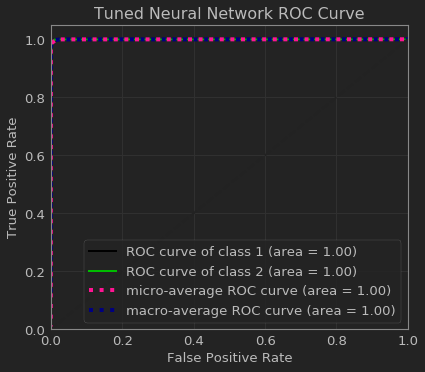

In [69]:
nn_prob = nn_fit.predict_proba(Xval) 

plot_roc(Yval, nn_prob, title="Tuned Neural Network ROC Curve") 

In [0]:
lr_model = LogisticRegression(penalty='l2', intercept_scaling=1.25, fit_intercept=True) 
lr_fit = lr_model.fit(Xtrain2, Ytrain2)

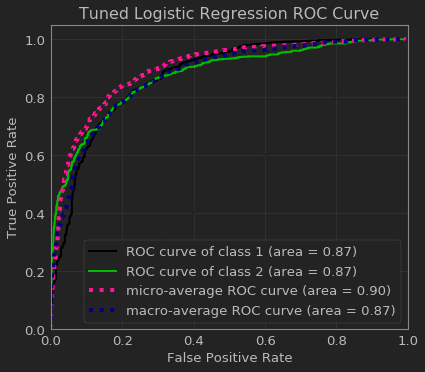

In [71]:
# Logistic Regression ROC Curve 

lr_prob = lr_fit.predict_proba(Xval) 

plot_roc(Yval, lr_prob, title="Tuned Logistic Regression ROC Curve") 